# Samples Mapping Test

## Imports 

In [1]:
from striplog import Component, Lexicon, Legend, Interval, Position, Decor
from core.visual import Borehole3D
from utils.lexicon.lexicon_memoris import lithology_memoris
from utils.omf import build_bh3d_legend_cmap
from utils.utils import legend_from_attributes
import random
import pandas as pd

## Creation of Borehole3D objects

### Define a set of attributes and associated legends

In [2]:
legend_attributes = [('lithology', lithology_memoris), 'benzene', 'toluene']

In [3]:
leg_dict = legend_from_attributes(legend_attributes)

In [4]:
leg_dict

{'lithology': {'legend': Legend(Decor({'_colour': '#ffffe9', 'width': None, 'hatch': None, 'component': Component({'lithology': 'matériau(?:x)? meuble(?:s)?'})})
  Decor({'_colour': '#ffffd5', 'width': None, 'hatch': "'....'", 'component': Component({'lithology': 'alluvion(?:s)?'})})
  Decor({'_colour': '#331100', 'width': None, 'hatch': None, 'component': Component({'lithology': 'boue(?:s)?'})})
  Decor({'_colour': '#d3b798', 'width': None, 'hatch': "'v'", 'component': Component({'lithology': 'remblai(?:s)?'})})
  Decor({'_colour': '#ffcc99', 'width': None, 'hatch': None, 'component': Component({'lithology': 'tourbe(?:s)?'})})
  Decor({'_colour': '#ffeaa7', 'width': None, 'hatch': None, 'component': Component({'lithology': 'gypse(?:s)?'})})
  Decor({'_colour': '#00151a', 'width': None, 'hatch': None, 'component': Component({'lithology': 'houille(?:s)?'})})
  Decor({'_colour': '#798732', 'width': None, 'hatch': "'-.'", 'component': Component({'lithology': 'limon(?:s)?'})})
  Decor({'_c

In [5]:
attrib = list(leg_dict.keys())
attrib

['lithology', 'benzene', 'toluene']

### Create boreholes composition

In [6]:
samples = [Component({'lithology': 'remblais'}),
           Component({'lithology': 'limon'}),
           Component({'lithology': 'schistes'}),
           Component({'lithology': 'sable'}),
           Component({'lithology': 'calcaire'}),
           Component({'lithology': 'inconnu'})]

In [7]:
benzene = [Component({'benzene':'Inconnu', 'Type':'Sol'}), 
           Component({'benzene':'VR', 'Type':'Sol'}),
           Component({'benzene':'VS', 'Type':'Sol'}),
           Component({'benzene':'VI', 'Type':'Sol'})]

toluene = [Component({'toluene':'VR', 'Type':'Sol'}),
           Component({'toluene':'Inconnu', 'Type':'Sol'}),
           Component({'toluene':'VS', 'Type':'Sol'}),
           Component({'toluene':'VI', 'Type':'Sol'})]

In [8]:
samples_intervals = [Interval(top=0, base=2, components=[samples[3], samples[0], benzene[2]], data={'Naphtalene':50}),
                     Interval(top=2, base=3, components=[samples[0], benzene[0]], data={'benzene': {'value': 1.52, 'units': 'µg/l'}}),
                     Interval(top=3, base=6, components=[toluene[2], samples[2]]),
                     Interval(top=6, base=8, components=[benzene[3]]),
                     Interval(top=8, base=10, components=[samples[4], benzene[1], toluene[1]]),
                     Interval(top=10, base=13, components=[samples[2],toluene[0]]),]
                     #Interval(top=13, base=15, components=[])]

In [9]:
samples_intervals_2 = [Interval(top=0, base=2, components=[samples[4]], data={'Naphtalene':50}),
                     Interval(top=2, base=3, components=[samples[1], benzene[1]]),
                     Interval(top=3, base=6, components=[samples[3]]),
                     Interval(top=6, base=8, components=[samples[4], toluene[3]]),
                     Interval(top=8, base=10, components=[samples[0], benzene[2], toluene[1]]),
                     Interval(top=10, base=13, components=[samples[2]])]

In [10]:
verbose = ['get_comp', 'build_leg'] # outputs of specific function ('geom', 'get_comp', 'get_attrib', 'build_leg')
verbose = False

In [11]:
bh3d_1 = Borehole3D(name='BH_1', intervals=samples_intervals, legend_dict=leg_dict, verbose=verbose, 
                    repr_attribute='benzene')

bh3d_2 = Borehole3D(name='BH_2', intervals=samples_intervals_2, legend_dict=leg_dict, verbose=verbose)
bh3d_list = [bh3d_1, bh3d_2]

Borehole geometry created successfully !
Borehole geometry created successfully !


## Checkings

In [12]:
bh = 0

In [13]:
bh3d_list[bh].get_attrib_components_dict(verbose=verbose)

{'lithology': [Component({'lithology': 'sable'}),
  Component({'lithology': 'remblais'}),
  Component({'lithology': 'schistes'}),
  Component({'lithology': 'Inconnu'}),
  Component({'lithology': 'calcaire'}),
  Component({'lithology': 'schistes'})],
 'benzene': [Component({'benzene': 'VS', 'Type': 'Sol'}),
  Component({'benzene': 'Inconnu', 'Type': 'Sol'}),
  Component({'benzene': 'Inconnu'}),
  Component({'benzene': 'VI', 'Type': 'Sol'}),
  Component({'benzene': 'VR', 'Type': 'Sol'}),
  Component({'benzene': 'Inconnu'})],
 'toluene': [Component({'toluene': 'Inconnu'}),
  Component({'toluene': 'Inconnu'}),
  Component({'toluene': 'VS', 'Type': 'Sol'}),
  Component({'toluene': 'Inconnu'}),
  Component({'toluene': 'Inconnu', 'Type': 'Sol'}),
  Component({'toluene': 'VR', 'Type': 'Sol'})]}

In [14]:
bh3d_list[bh].components

{0: [Component({'lithology': 'sable'}),
  Component({'lithology': 'remblais'}),
  Component({'benzene': 'VS', 'Type': 'Sol'}),
  Component({'toluene': 'Inconnu'})],
 1: [Component({'lithology': 'remblais'}),
  Component({'benzene': 'Inconnu', 'Type': 'Sol'}),
  Component({'toluene': 'Inconnu'})],
 2: [Component({'toluene': 'VS', 'Type': 'Sol'}),
  Component({'lithology': 'schistes'}),
  Component({'benzene': 'Inconnu'})],
 3: [Component({'benzene': 'VI', 'Type': 'Sol'}),
  Component({'lithology': 'Inconnu'}),
  Component({'toluene': 'Inconnu'})],
 4: [Component({'lithology': 'calcaire'}),
  Component({'benzene': 'VR', 'Type': 'Sol'}),
  Component({'toluene': 'Inconnu', 'Type': 'Sol'})],
 5: [Component({'lithology': 'schistes'}),
  Component({'toluene': 'VR', 'Type': 'Sol'}),
  Component({'benzene': 'Inconnu'})]}

In [15]:
bh3d_list[bh].attrib_components

[Component({'benzene': 'VS', 'Type': 'Sol'}),
 Component({'benzene': 'Inconnu', 'Type': 'Sol'}),
 Component({'benzene': 'Inconnu'}),
 Component({'benzene': 'VI', 'Type': 'Sol'}),
 Component({'benzene': 'VR', 'Type': 'Sol'}),
 Component({'benzene': 'Inconnu'})]

##### VTK tables

In [16]:
a = 0
attrib[a]

'lithology'

In [17]:
vtk = bh3d_list[bh]._vtk
vtk

PolyData (0x7f97a4dfdac0)
  N Cells:	312
  N Points:	1200
  X Bounds:	-1.248e+00, 1.248e+00
  Y Bounds:	-1.250e+00, 1.250e+00
  Z Bounds:	-3.000e+00, 1.000e+01
  N Arrays:	5

In [18]:
vtk[attrib[a]].shape, vtk[attrib[a]]

((312,),
 array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
        1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
        1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2,
        2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
        2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
        2, 2, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3,
        3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3,
        3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4,
        4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4,
        4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 2, 2, 2, 2,
        2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
        2, 2, 2, 2, 2, 2, 2, 

In [19]:
bh3d_list[bh].geometry.data[0].name #.array

'lithology'

In [20]:
bh3d_list[bh].geometry.data[0].array.array.tolist()

[0, 1, 2, 3, 4, 2]

## 2D/3D display

### Borehole #1

In [21]:
bh = 0
a = 0

In [22]:
bh3d_list[bh].legend_dict[attrib[a]]['legend']

Legend(Decor({'_colour': '#ffcb23', 'width': 3, 'hatch': "'..'", 'component': Component({'lithology': 'sable'})})
Decor({'_colour': '#d3b798', 'width': 3, 'hatch': "'v'", 'component': Component({'lithology': 'remblais'})})
Decor({'_colour': '#bbffdd', 'width': 3, 'hatch': "'--'", 'component': Component({'lithology': 'schistes'})})
Decor({'_colour': '#ffffff', 'width': 3, 'hatch': None, 'component': Component({'lithology': 'Inconnu'})})
Decor({'_colour': '#149eff', 'width': 3, 'hatch': "'='", 'component': Component({'lithology': 'calcaire'})}))

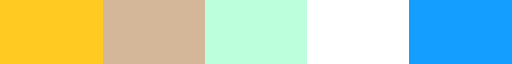

In [23]:
bh3d_list[bh].legend_dict[attrib[a]]['cmap']

/home/yanathan/Projects/GSDMA/utils/utils.py:264: MatplotlibDeprecationWarning: hatch must consist of a string of "*+-./OX\ox|" or None, but found the following invalid values "'". Passing invalid values is deprecated since 3.4 and will become an error two minor releases later.
  rect = mpl.patches.Rectangle(origin, w, thick, fc=fc, lw=lw, hatch=d.hatch,
/home/yanathan/Projects/GSDMA/utils/utils.py:264: MatplotlibDeprecationWarning: hatch must consist of a string of "*+-./OX\ox|" or None, but found the following invalid values "'v". Passing invalid values is deprecated since 3.4 and will become an error two minor releases later.
  rect = mpl.patches.Rectangle(origin, w, thick, fc=fc, lw=lw, hatch=d.hatch,
/home/yanathan/Projects/GSDMA/utils/utils.py:264: MatplotlibDeprecationWarning: hatch must consist of a string of "*+-./OX\ox|" or None, but found the following invalid values "'=". Passing invalid values is deprecated since 3.4 and will become an error two minor releases later.
  rec

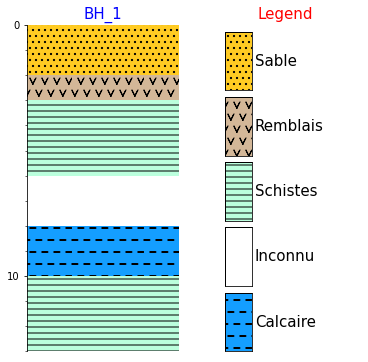

In [24]:
bh3d_list[bh].log_plot(repr_attribute=attrib[a])

In [25]:
bh3d_list[bh].plot3d(repr_attribute=attrib[a], str_annotations=True, custom_legend=False)

ViewInteractiveWidget(height=768, layout=Layout(height='auto', width='100%'), width=1024)

In [26]:
bh3d_list[bh].plot3d(repr_attribute=attrib[a+1], str_annotations=True, custom_legend=False)

ViewInteractiveWidget(height=768, layout=Layout(height='auto', width='100%'), width=1024)

In [27]:
bh3d_list[bh].plot3d(repr_attribute=attrib[a+2], str_annotations=True, custom_legend=False)

ViewInteractiveWidget(height=768, layout=Layout(height='auto', width='100%'), width=1024)

## Build several boreholes legend/cmap (for a project) test

In [28]:
synth_leg_dict, detail_leg_dict = build_bh3d_legend_cmap(bh3d_list, legend_dict=leg_dict, 
                                                         repr_attrib_list=['lithology', 'pollutant'], 
                                                         compute_all=True, verbose=verbose)

In [29]:
b = 1
synth_leg_dict[attrib[b]]['legend']

Legend(Decor({'_colour': '#ffa500', 'width': 3, 'component': Component({'benzene': 'VS'}), 'hatch': None})
Decor({'_colour': '#ffffff', 'width': 3, 'component': Component({'benzene': 'Inconnu'}), 'hatch': None})
Decor({'_colour': '#ff0000', 'width': 3, 'component': Component({'benzene': 'VI'}), 'hatch': None})
Decor({'_colour': '#00ff00', 'width': 3, 'component': Component({'benzene': 'VR'}), 'hatch': None}))

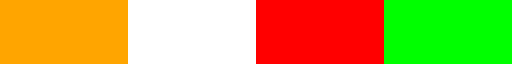

In [30]:
synth_leg_dict[attrib[b]]['cmap']